In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py

## IMPORTING DATASET OF GOLD(KAGGLE DATA)

In [96]:
gold_data=pd.read_csv(r"C:\Users\sjain\Desktop\python\archive (2)\gld_price_data.csv")

In [97]:
gold_data.sample(7)

,Date,SPX,GLD,USO,SLV,EUR/USD
1940,10/26/2016,2139.429932,120.790001,11.090000,16.709999,1.091203
1919,9/20/2016,2139.760010,125.440002,10.070000,18.270000,1.115399
114,7/9/2008,1244.689941,91.500000,109.650002,17.950001,1.578507
752,6/6/2011,1286.170044,150.479996,39.000000,35.709999,1.458300
345,8/12/2009,1005.809998,92.949997,37.349998,14.340000,1.427593
422,12/16/2009,1109.180054,111.589996,36.740002,17.360001,1.452602
1999,1/24/2017,2280.070068,115.269997,11.370000,16.219999,1.076079


In [98]:
import datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [99]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [100]:
gold_data.shape

(2290, 6)

In [101]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

C:\Users\sjain\AppData\Local\Temp\ipykernel_5112\1471883891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue',hist=True)


<Axes: xlabel='GLD', ylabel='Density'>

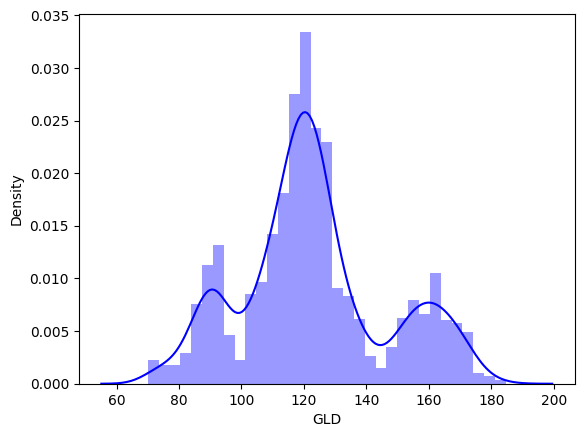

In [102]:
sns.distplot(gold_data['GLD'],color='blue',hist=True)

In [103]:
correl=gold_data.corr()

In [104]:
print(correl['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Text(0.5, 1.0, 'Correlation of df Features')

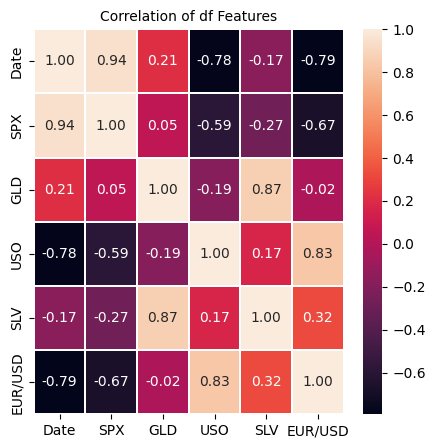

In [105]:
py.figure(figsize = (5,5))
sns.heatmap(correl,
            xticklabels=correl.columns.values,
            yticklabels=correl.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
py.title('Correlation of df Features',  size=10)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(gold_data.drop(['Date','GLD'],axis=1),gold_data['GLD'],test_size=0.2,random_state=3)

In [108]:
X_train

,SPX,USO,SLV,EUR/USD
1581,2107.780029,18.490000,15.580000,1.117905
2172,2584.840088,11.380000,16.090000,1.166113
985,1313.719971,29.799999,26.709999,1.250469
1267,1733.150024,36.380001,21.049999,1.366699
2042,2341.590088,10.040000,17.150000,1.086095
...,...,...,...,...
789,1120.760010,31.780001,38.439999,1.412469
968,1318.859985,34.090000,27.049999,1.256124
1667,2067.639893,15.650000,13.920000,1.109004
1688,1913.849976,14.810000,13.940000,1.129344


# MODEL TRAINING USING RANDOM FOREST REGRESSOR 

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
model=RandomForestRegressor()

In [111]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [112]:
predicted_data=model.predict(X_test)
type(predicted_data)

numpy.ndarray

In [113]:
from sklearn import metrics

In [114]:
## CHECKING ERROR SCORES
r2_score=metrics.r2_score(predicted_data,Y_test)
mse=metrics.mean_squared_error(predicted_data,Y_test)

In [115]:
print("THE R2_SCORE  IS:",r2_score)
print("THE MEAN SQUARED ERROR  IS:",mse)


THE R2_SCORE  IS: 0.9850800629180672
THE MEAN SQUARED ERROR  IS: 8.798893949204869


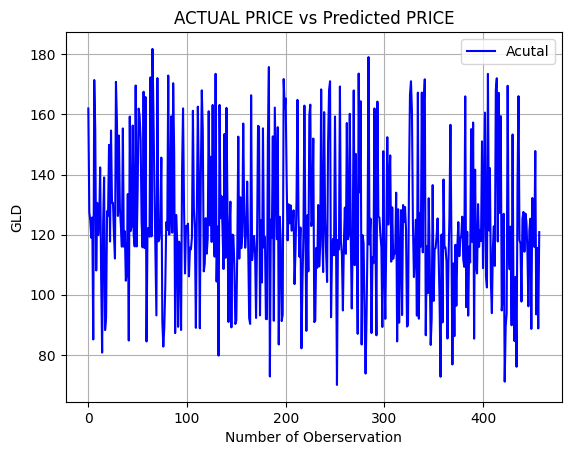

In [116]:

py.plot(list(Y_test), color = 'blue', label = 'Acutal')
#py.plot(list(predicted_data), color = 'deeppink', label = 'Predicted')
py.grid(0.3)
py.title('ACTUAL PRICE vs Predicted PRICE')
py.xlabel('Number of Oberservation')
py.ylabel('GLD')
py.legend()
py.show()

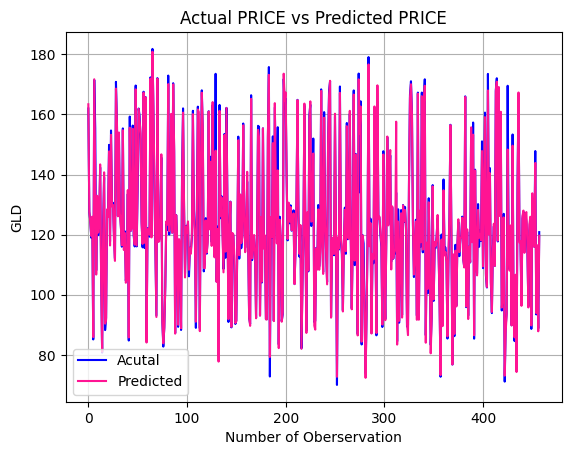

In [117]:
py.plot(list(Y_test), color = 'blue', label = 'Acutal')
py.plot(list(predicted_data), color = 'deeppink', label = 'Predicted')
py.grid(0.3)
py.title('Actual PRICE vs Predicted PRICE')
py.xlabel('Number of Oberservation')
py.ylabel('GLD')
py.legend()
py.show()